<a href="https://colab.research.google.com/github/huanyanwei/analytics-projects/blob/main/Web_Server_Logs_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actual Data

To calculate expected values `f_exp`

In [ ]:
import pandas as pd 

data = pd.read_csv("weblog_2.csv") 
data.head()

,IP,Time,URL,Status
0,10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200
1,10.128.2.1,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302
2,10.128.2.1,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200
3,10.131.2.1,[29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200
4,10.130.2.1,[29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200


In [ ]:
df = data
df[['Type','Page','Ignore']] = df['URL'].str.split(' ', 2, expand=True)

In [ ]:
df.head()

,IP,Time,URL,Status,Type,Page,Ignore
0,10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200,GET,/login.php,HTTP/1.1
1,10.128.2.1,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302,POST,/process.php,HTTP/1.1
2,10.128.2.1,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200,GET,/home.php,HTTP/1.1
3,10.131.2.1,[29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200,GET,/js/vendor/moment.min.js,HTTP/1.1
4,10.130.2.1,[29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,GET,/bootstrap-3.3.7/js/bootstrap.js,HTTP/1.1


In [ ]:
df['Status'].value_counts(normalize=True) * 100

200    71.758819
302    22.154665
304     4.167458
404     1.589714
206     0.329343
Name: Status, dtype: float64

In [ ]:
df['Type'].value_counts(normalize=True) * 100

GET     95.623535
POST     4.319463
HEAD     0.057002
Name: Type, dtype: float64

In [ ]:
df['Page'].value_counts(normalize=True) * 100

/login.php                                                         20.887960
/home.php                                                          16.802837
/js/vendor/modernizr-2.8.3.min.js                                   8.974603
/                                                                   5.459497
/contestproblem.php?name=RUET%20OJ%20Server%20Testing%20Contest     2.957755
                                                                     ...    
/edit.php?name=ksrsingh                                             0.006334
/details.php?name=Magic%20Square&cod=13                             0.006334
/allsubmission.php?name=zerocool                                    0.006334
/standings.php?id=3                                                 0.006334
/countdown.php                                                      0.006334
Name: Page, Length: 265, dtype: float64

In [ ]:
# Remove anything from "?" onwards as they may be from the same page
df['Page_New'] = df['Page'].str.split('?').str[0]
df['Page_New'].head()

0                          /login.php
1                        /process.php
2                           /home.php
3            /js/vendor/moment.min.js
4    /bootstrap-3.3.7/js/bootstrap.js
Name: Page_New, dtype: object

In [ ]:
df['Page_New'].value_counts(normalize=True) * 100

/login.php                                   21.698651
/home.php                                    16.802837
/js/vendor/modernizr-2.8.3.min.js             8.974603
/                                             5.459497
/contestproblem.php                           3.521439
                                               ...    
/fonts/glyphicons-halflings-regular.woff2     0.019001
/fonts/glyphicons-halflings-regular.woff      0.012667
//home.php                                    0.012667
/adminpanel.php                               0.006334
/css/bootstrap.min.css.map                    0.006334
Name: Page_New, Length: 62, dtype: float64

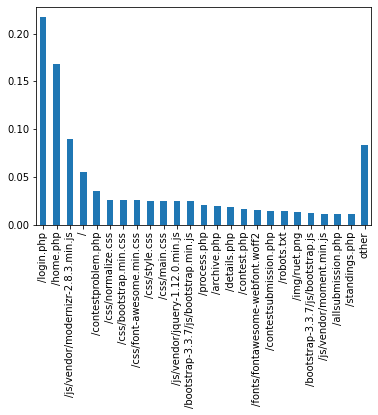

In [ ]:
prob = df['Page_New'].value_counts(normalize=True)
threshold = 0.01
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='bar')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


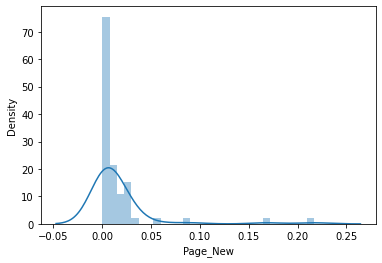

In [ ]:
import seaborn as sns
prob = df['Page_New'].value_counts(normalize=True)
sns.distplot(prob, hist=True, kde=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


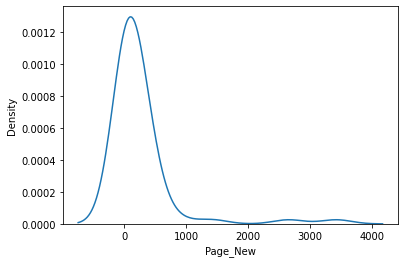

In [ ]:
import seaborn as sns
prob = df['Page_New'].value_counts(normalize=False)
sns.distplot(prob, hist=False, kde=True)

In [ ]:
f_exp_status = df['Status'].value_counts(normalize=True) * 100
print(f_exp_status)
f_exp_type = df['Type'].value_counts(normalize=True) * 100
f_exp_page = df['Page_New'].value_counts(normalize=True) * 100

200    71.758819
302    22.154665
304     4.167458
404     1.589714
206     0.329343
Name: Status, dtype: float64


In order to perform $\chi^2$ Goodness of Fit test, need to ensure frequency of all inputs are at least of 5. (Arbitary Number, can be changed)

In [ ]:
counts = df['Page_New'].value_counts()
df3 = df[~df['Page_New'].isin(counts[counts < 10].index)]
df3['Page_New'].value_counts()

/login.php                              3426
/home.php                               2653
/js/vendor/modernizr-2.8.3.min.js       1417
/                                        862
/contestproblem.php                      556
/css/normalize.css                       408
/css/bootstrap.min.css                   404
/css/font-awesome.min.css                399
/css/style.css                           395
/css/main.css                            394
/js/vendor/jquery-1.12.0.min.js          387
/bootstrap-3.3.7/js/bootstrap.min.js     383
/process.php                             317
/archive.php                             309
/details.php                             297
/contest.php                             249
/fonts/fontawesome-webfont.woff2         246
/contestsubmission.php                   228
/robots.txt                              224
/img/ruet.png                            213
/bootstrap-3.3.7/js/bootstrap.js         191
/js/vendor/moment.min.js                 173
/allsubmis

In [ ]:
f_exp_page = df3['Page_New'].value_counts(normalize=True) * 100
print(f_exp_page)

/login.php                              21.817487
/home.php                               16.894861
/js/vendor/modernizr-2.8.3.min.js        9.023753
/                                        5.489397
/contestproblem.php                      3.540725
/css/normalize.css                       2.598230
/css/bootstrap.min.css                   2.572757
/css/font-awesome.min.css                2.540916
/css/style.css                           2.515443
/css/main.css                            2.509075
/js/vendor/jquery-1.12.0.min.js          2.464497
/bootstrap-3.3.7/js/bootstrap.min.js     2.439024
/process.php                             2.018723
/archive.php                             1.967777
/details.php                             1.891358
/contest.php                             1.585684
/fonts/fontawesome-webfont.woff2         1.566580
/contestsubmission.php                   1.451952
/robots.txt                              1.426479
/img/ruet.png                            1.356429


# Modified Data

To simulate `f_obs` 


In [ ]:
data2 = pd.read_csv("weblog_fake.csv") 
df2 = data2
df2[['Type','Page','Ignore']] = df2['URL'].str.split(' ', 2, expand=True)

In [ ]:
f_obs_status = df2['Status'].value_counts(normalize=True) * 100
print(f_obs_status)

200    68.488978
302    28.065118
304     2.407547
404     0.822169
206     0.216188
Name: Status, dtype: float64


In [ ]:
f_obs_type = df2['Type'].value_counts(normalize=True) * 100
print(f_obs_type)

GET     92.652887
POST     7.317632
HEAD     0.029480
Name: Type, dtype: float64


In [ ]:
df2['Page_New'] = df2['Page'].str.split('?').str[0]
f_obs_page = df2['Page_New'].value_counts(normalize=True) * 100
print(f_obs_page)

/login.php                                  24.540601
/home.php                                   15.840676
/                                            5.260572
/process.php                                 5.109896
/js/vendor/modernizr-2.8.3.min.js            4.985424
                                              ...    
/editcontest.php                             0.009827
/fonts/glyphicons-halflings-regular.woff     0.006551
//home.php                                   0.006551
/adminpanel.php                              0.003276
/css/bootstrap.min.css.map                   0.003276
Name: Page_New, Length: 62, dtype: float64


In order to perform $\chi^2$ Goodness of Fit test, need to ensure frequency of all inputs are at least of 5. (Arbitary Number, can be changed)

In [ ]:
df2['Type'].value_counts()

GET     28286
POST     2234
HEAD        9
Name: Type, dtype: int64

In [ ]:
df2['Page_New'].value_counts()

/login.php                                  7492
/home.php                                   4836
/                                           1606
/process.php                                1560
/js/vendor/modernizr-2.8.3.min.js           1522
                                            ... 
/editcontest.php                               3
/fonts/glyphicons-halflings-regular.woff       2
//home.php                                     2
/adminpanel.php                                1
/css/bootstrap.min.css.map                     1
Name: Page_New, Length: 62, dtype: int64


In [ ]:
counts = df2['Page_New'].value_counts()
df4 = df2[~df2['Page_New'].isin(counts[counts < 10].index)]
df4['Page_New'].value_counts()

/login.php                              7492
/home.php                               4836
/                                       1606
/process.php                            1560
/js/vendor/modernizr-2.8.3.min.js       1522
/logout.php                             1498
/contestproblem.php                     1152
/css/bootstrap.min.css                   523
/bootstrap-3.3.7/js/bootstrap.js         521
/css/normalize.css                       513
/css/font-awesome.min.css                511
/css/style.css                           507
/js/vendor/jquery-1.12.0.min.js          506
/js/vendor/moment.min.js                 503
/img/ruet.png                            501
/css/main.css                            499
/bootstrap-3.3.7/js/bootstrap.min.js     488
/profile.php                             463
/sign.php                                445
/contest.php                             424
/archive.php                             386
/action.php                              378
/js/chart.

In [ ]:
f_obs_page = df4['Page_New'].value_counts(normalize=True) * 100
print(f_obs_page)

/login.php                              24.605077
/home.php                               15.882295
/                                        5.274393
/process.php                             5.123321
/js/vendor/modernizr-2.8.3.min.js        4.998522
/logout.php                              4.919702
/contestproblem.php                      3.783375
/css/bootstrap.min.css                   1.717626
/bootstrap-3.3.7/js/bootstrap.js         1.711058
/css/normalize.css                       1.684784
/css/font-awesome.min.css                1.678216
/css/style.css                           1.665079
/js/vendor/jquery-1.12.0.min.js          1.661795
/js/vendor/moment.min.js                 1.651943
/img/ruet.png                            1.645374
/css/main.css                            1.638806
/bootstrap-3.3.7/js/bootstrap.min.js     1.602680
/profile.php                             1.520575
/sign.php                                1.461460
/contest.php                             1.392492


# $\chi^2$ test on `f_obs` & `f_exp`

In [ ]:
from scipy.stats import chisquare
chisquare(f_obs_status, f_exp=f_exp_status)

Power_divergenceResult(statistic=2.8784683554369432, pvalue=0.5783650419060467)

In [ ]:
chisquare(f_obs_status, f_exp=f_exp_status, ddof=4)

Power_divergenceResult(statistic=2.8784683554369432, pvalue=nan)

In [ ]:
chisquare(f_obs_type, f_exp=f_exp_type)

Power_divergenceResult(statistic=2.18662478513726, pvalue=0.3351046551310318)

## Original $\chi^2$ test on pages without removing freq less than 10

In [ ]:
chisquare(f_obs_page, f_exp=f_exp_page)

Power_divergenceResult(statistic=7.62429287251104, pvalue=1.0)

## Updated $\chi^2$ test on pages after removing freq less than 10

In [ ]:
# Because f_obs_page is found to be one length longer than f_exp_page...
f_obs_page.drop(f_obs_page.tail(1).index,inplace=True) 

In [ ]:
chisquare(f_obs_page, f_exp=f_exp_page)

Power_divergenceResult(statistic=7.510198308575736, pvalue=0.9999999993567241)

# Parsing of the other web server logs 

In [ ]:
!pip install apache-log-parser

  Created wheel for apache-log-parser: filename=apache_log_parser-1.7.0-cp36-none-any.whl size=8861 sha256=d2f67c1d2fe49ef98bfe20506f04852154372ca84abf31f4b521cfe2ac193d0c
  Stored in directory: /root/.cache/pip/wheels/c1/05/73/0987fbe153fbd0593f80ec73f1701dcc30f09470c9c8e4023d
Successfully built apache-log-parser


In [ ]:
import apache_log_parser
#line_parser = apache_log_parser.make_parser("%h <<%P>> %t %Dus \"%r\" %>s %b  \"%{Referer}i\" \"%{User-Agent}i\" %l %u")
#log_line_data = line_parser('127.0.0.1 <<6113>> [16/Aug/2013:15:45:34 +0000] 1966093us "GET / HTTP/1.1" 200 3478  "https://example.com/" "Mozilla/5.0 (X11; U; Linux x86_64; en-US; rv:1.9.2.18)" - -')

line_parser = apache_log_parser.make_parser("%h %l %u %t \"%r\" %>s %b \"%{Referer}i\" \"%{User-agent}i\"")
log_line_data = line_parser('83.149.9.216 - - [17/May/2015:10:05:03 +0000] "GET /presentations/logstash-monitorama-2013/images/kibana-search.png HTTP/1.1" 200 203023 "http://semicomplete.com/presentations/logstash-monitorama-2013/" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1700.77 Safari/537.36"')

from pprint import pprint
pprint(log_line_data)


{'remote_host': '83.149.9.216',
 'remote_logname': '-',
 'remote_user': '-',
 'request_first_line': 'GET '
                       '/presentations/logstash-monitorama-2013/images/kibana-search.png '
                       'HTTP/1.1',
 'request_header_referer': 'http://semicomplete.com/presentations/logstash-monitorama-2013/',
 'request_header_user_agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1) '
                              'AppleWebKit/537.36 (KHTML, like Gecko) '
                              'Chrome/32.0.1700.77 Safari/537.36',
 'request_http_ver': '1.1',
 'request_method': 'GET',
 'request_url': '/presentations/logstash-monitorama-2013/images/kibana-search.png',
 'request_url_fragment': '',
 'request_url_hostname': None,
 'request_url_netloc': '',
 'request_url_password': None,
 'request_url_path': '/presentations/logstash-monitorama-2013/images/kibana-search.png',
 'request_url_port': None,
 'request_url_query': '',
 'request_url_query_dict': {},
 'request_url_query_list'